In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow scikit-learn


In [ ]:
!unzip "/content/drive/My Drive/DataSet.zip" -d "/content"


Streaming output truncated to the last 5000 lines.
  inflating: /content/DataSet/train/images/FisheyeCamera_1_00312_png.rf.0f026f535efd3c25c4c3bd985f169bdd.jpg  
  inflating: /content/DataSet/valid/images/00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.jpg  
  inflating: /content/DataSet/valid/images/000297_jpg.rf.b373c5e86c5e0fcfe7a99082beeba1d2.jpg  
  inflating: /content/DataSet/valid/images/000352_jpg.rf.d63e34658183df08ad20ef345a34795f.jpg  
  inflating: /content/DataSet/valid/images/000387_jpg.rf.7119e3f9c6a97ec54b1de9f62fd6f7b2.jpg  
  inflating: /content/DataSet/valid/images/000242_jpg.rf.ce0b1a3828ba64c185b3638cd90951c6.jpg  
  inflating: /content/DataSet/valid/images/000354_jpg.rf.b7ccfe0e9fd239ec28a6518202c7c531.jpg  
  inflating: /content/DataSet/valid/images/000319_jpg.rf.1fd32a8ec85d8ece29bdcc792fdf960c.jpg  
  inflating: /content/DataSet/valid/images/000330_jpg.rf.e8b0af092d57c4f34925bb7177a0b474.jpg  
  inflating: /content/DataSet/valid/images/00014_00010_0000

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class DataGenerator(Sequence):
    def __init__(self, data_dir, target_size=(416, 416), num_classes=15, batch_size=32):
        self.images_dir = os.path.join(data_dir, 'images')
        self.labels_dir = os.path.join(data_dir, 'labels')
        self.target_size = target_size
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.image_files = [f for f in os.listdir(self.images_dir) if f.endswith('.jpg')]

    def __len__(self):
        return int(np.ceil(len(self.image_files) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.image_files[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []

        for image_file in batch_files:
            image_path = os.path.join(self.images_dir, image_file)
            img = load_img(image_path, target_size=self.target_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)

            label_file = image_file.replace('.jpg', '.txt')
            label_path = os.path.join(self.labels_dir, label_file)
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        first_label = int(lines[0].split()[0])
                        labels.append(first_label)
                    else:
                        images.pop()
            else:
                images.pop()

        images = np.array(images)
        labels = np.array(labels)
        labels = np.eye(self.num_classes)[labels]
        return images, labels
    def get_all_labels(self):
        all_labels = []
        for image_file in self.image_files:
            label_file = image_file.replace('.jpg', '.txt')
            label_path = os.path.join(self.labels_dir, label_file)
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        class_id = int(line.split()[0])
                        all_labels.append(class_id)
                        break
        return np.array(all_labels)




In [ ]:

train_dir = '/content/DataSet/train'
val_dir = '/content/DataSet/valid'
test_dir = '/content/DataSet/test'

batch_size = 32
train_gen = DataGenerator(train_dir, target_size=(416, 416), num_classes=15, batch_size=batch_size)
val_gen = DataGenerator(val_dir, target_size=(416, 416), num_classes=15, batch_size=batch_size)
test_gen = DataGenerator(test_dir, target_size=(416, 416), num_classes=15, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(416, 416, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(416, 416, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(15, activation='softmax')
])
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 36s 285ms/step - accuracy: 0.1525 - loss: 2.6015 - val_accuracy: 0.2772 - val_loss: 2.1368
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 236ms/step - accuracy: 0.3448 - loss: 2.0431 - val_accuracy: 0.3858 - val_loss: 1.8793
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 234ms/step - accuracy: 0.4602 - loss: 1.6860 - val_accuracy: 0.4682 - val_loss: 1.5947
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5807 - loss: 1.2892 - val_accuracy: 0.5156 - val_loss: 1.5318
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.7179 - loss: 0.8909 - val_accuracy: 0.5243 - val_loss: 1.6057
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 0.8141 - loss: 0.6140 - val_accuracy: 0.5843 - val_loss: 1.5759
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.8777 - loss: 0.4050 - val_accuracy: 0.5880 - val_loss: 1.7694
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - accuracy: 0.9077 - loss: 0

In [ ]:
model.save('traffic_signs_model_without_crop_61_92.keras')


In [ ]:
test_loss, test_accuracy = model.evaluate(val_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6162 - loss: 2.1965
Test Accuracy: 61.92%


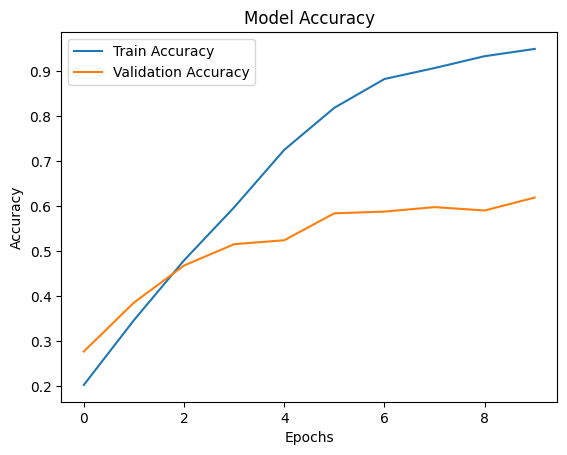

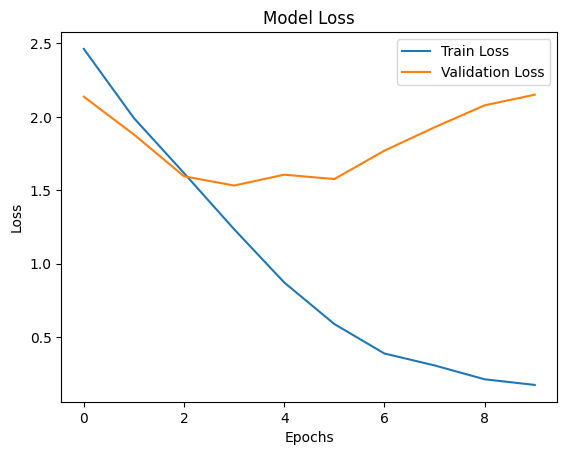

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


/content/DataSet/test/labels


In [ ]:
import numpy as np

predictions = model.predict(test_gen, verbose=1)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = []
for _, labels in test_gen:
    true_classes.extend(np.argmax(labels, axis=1))
    if len(true_classes) >= len(test_gen.image_files):
        break
true_classes = np.array(true_classes[:len(predicted_classes)])

print(f"Predicted: {predicted_classes[:10]}")
print(f"True: {true_classes[:10]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step
Predicted: [ 6  0  3 11 12  4 11  5  0  7]
True: [ 6  1 11 11 12  4 11 10  0  7]


In [ ]:
all_test_labels = test_gen.get_all_labels()
print("All test labels:", len(all_test_labels))

All test labels: 637


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step


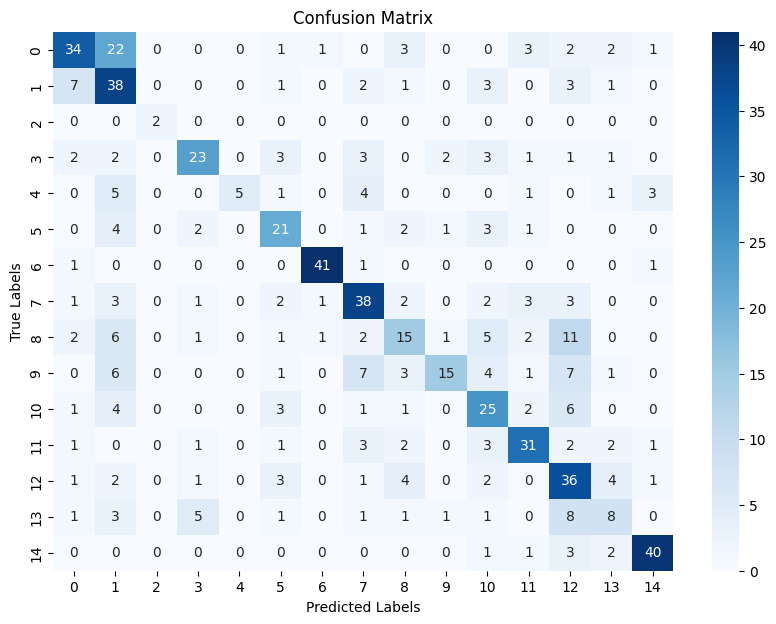

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_predictions = model.predict(test_gen, verbose=1)

test_predictions = np.argmax(test_predictions, axis=1)

cm = confusion_matrix(all_test_labels, test_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(all_test_labels), yticklabels=np.unique(all_test_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()